## Abalone Case Study

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3970,I,0.385,0.285,0.090,0.2480,0.0935,0.0660,0.0700,6
304,F,0.470,0.360,0.130,0.4720,0.1820,0.1140,0.1500,10
2999,F,0.635,0.525,0.180,1.3695,0.6340,0.3180,0.3630,11
2929,I,0.610,0.490,0.160,1.1545,0.5865,0.2385,0.2915,11
1025,M,0.645,0.520,0.175,1.6360,0.7790,0.3420,0.4320,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# getting the shape
df.shape

(4177, 9)

In [6]:
# Checking the statistics of the data
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# Checkin for the null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values in the dataset

In [10]:
# Checking columns
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

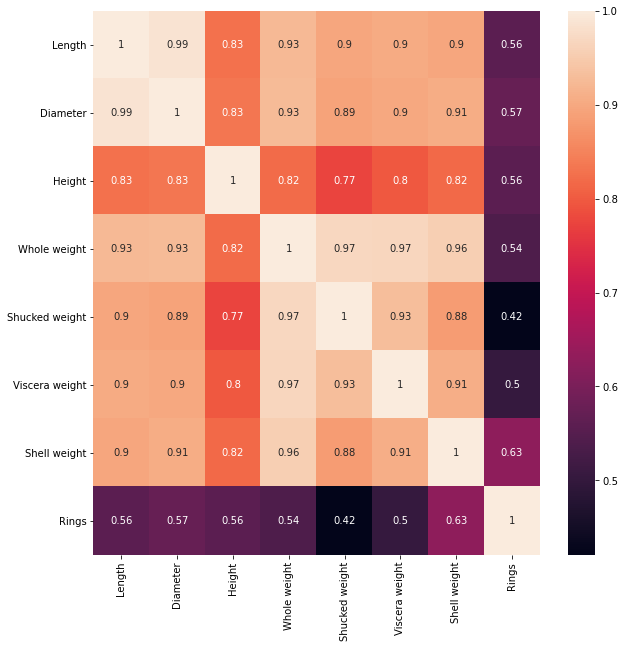

In [11]:
# Checking for the correlation 
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show

The fetures are highly correlated (less for height)

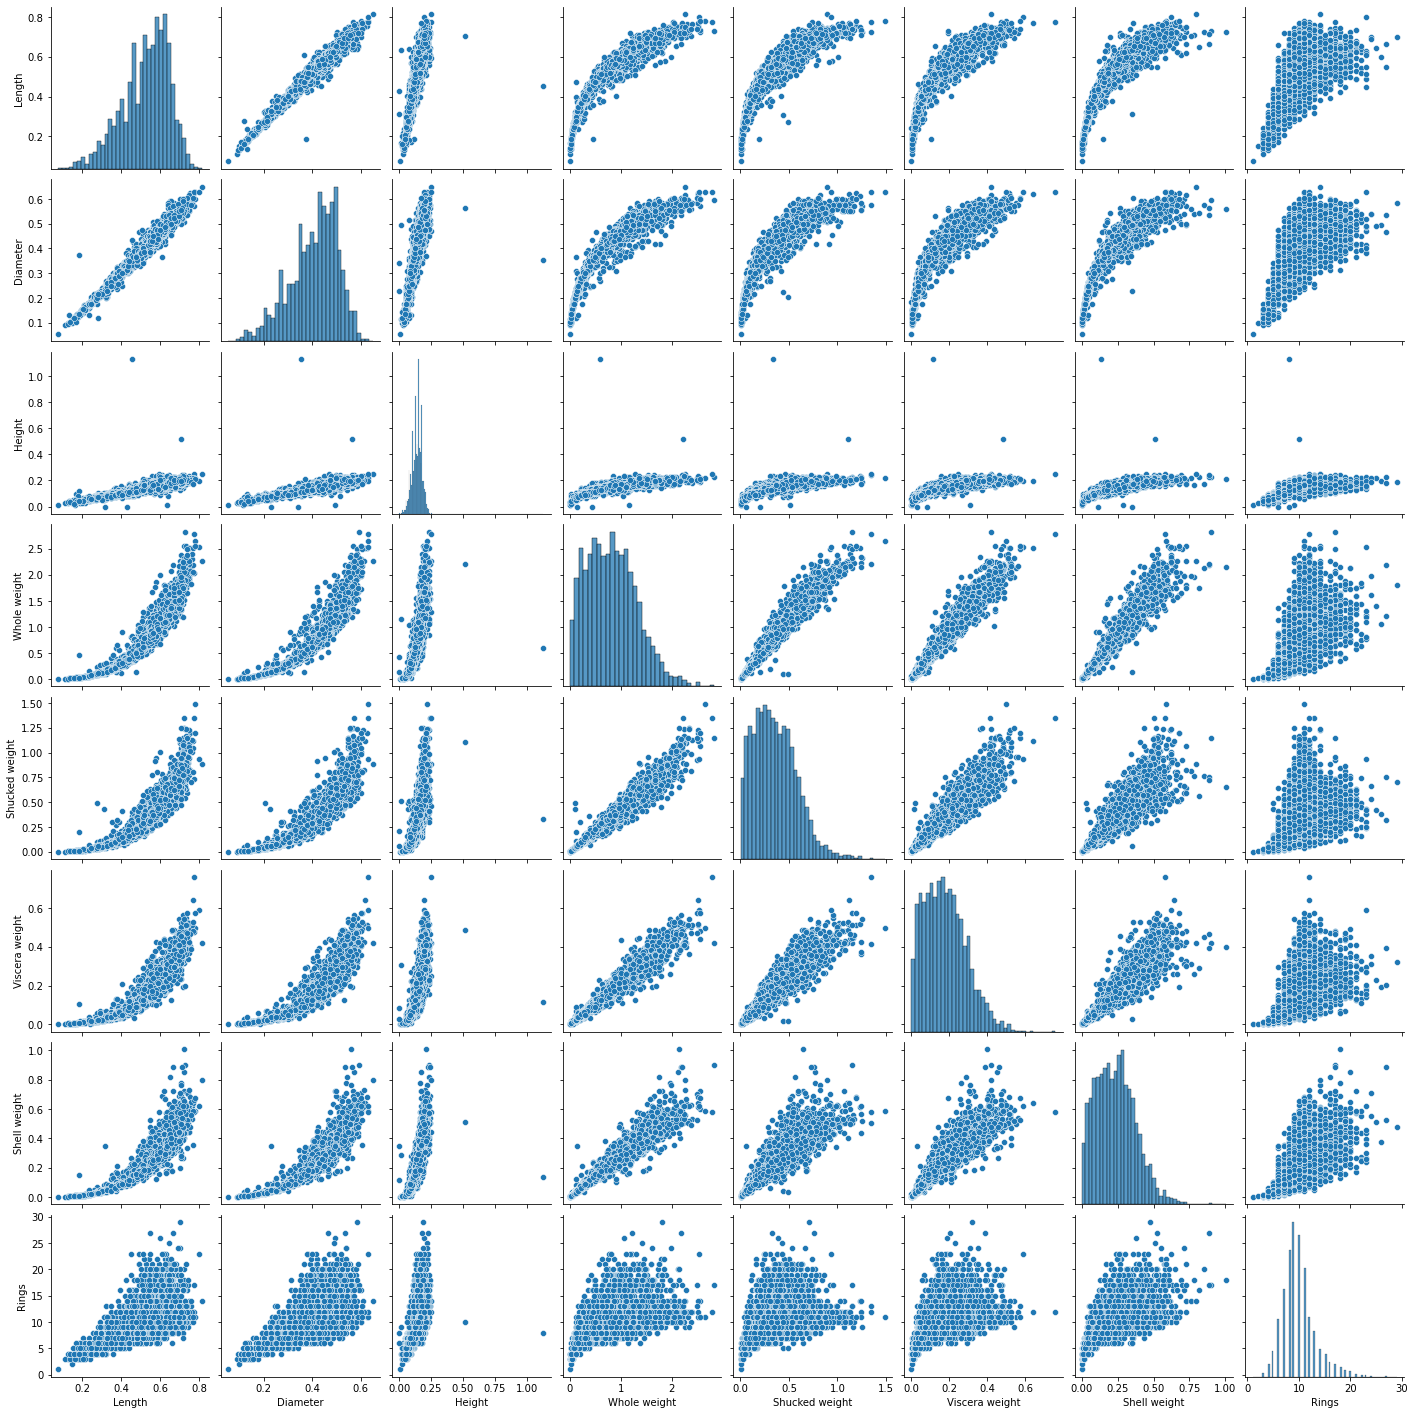

In [14]:
sns.pairplot(df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

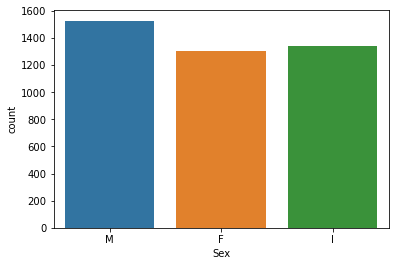

In [15]:
sns.countplot(df['Sex'])

In [16]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

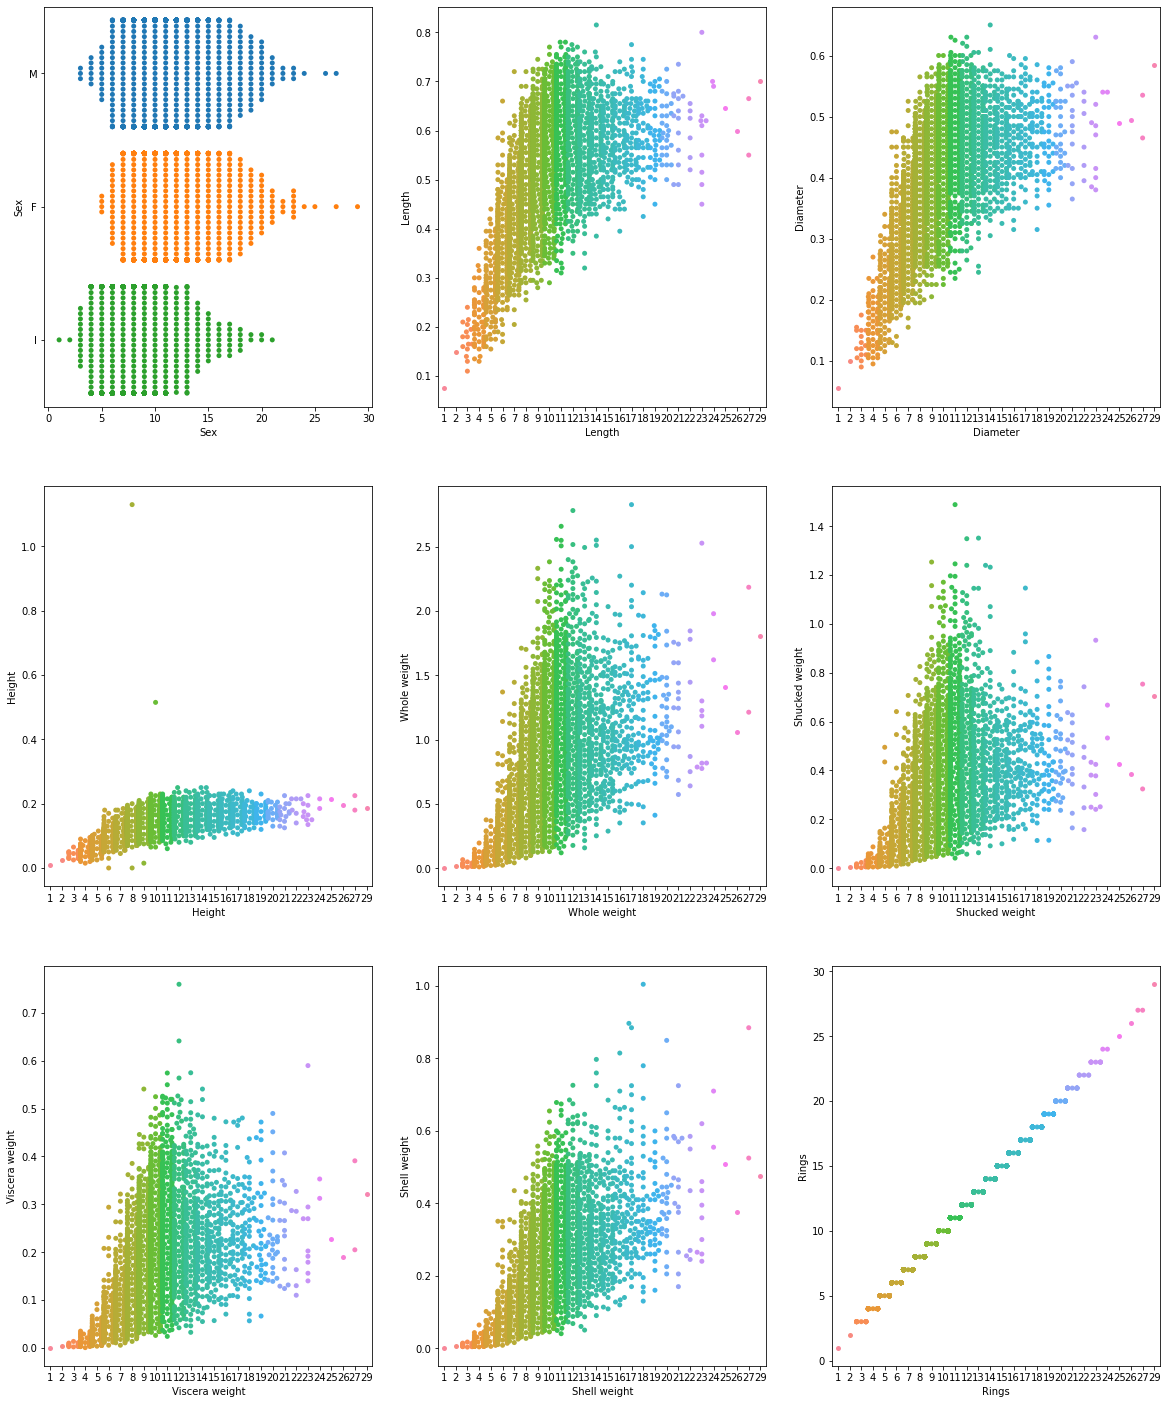

In [17]:
plt.figure(figsize=(20,25),facecolor="w")
graph=1

for columns in df:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.swarmplot(x=df['Rings'],y=df[columns])
        plt.xlabel(columns,fontsize=10)
    graph+=1
plt.show()

In [18]:
import pickle
filename="redwine_dataset.pkl"
pickle.dump(df,open(filename,"wb"))